In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import struct

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [5]:
train_x     = read_idx("train-images-idx3-ubyte")
train_y_arr = read_idx("train-labels-idx1-ubyte")
test_x      = read_idx("t10k-images-idx3-ubyte")
test_y_arr  = read_idx("t10k-labels-idx1-ubyte")

In [6]:
train_x = train_x.reshape([60000,28*28])
test_x = test_x.reshape([10000,28*28])


In [7]:
def one_hot(arr):
    
    res = np.zeros([arr.shape[0],10])
    res[np.arange(arr.shape[0]),arr] = 1
    return res

In [8]:
train_y = one_hot(train_y_arr)
test_y = one_hot(test_y_arr)

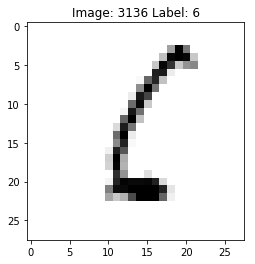

In [10]:
# display random image (check if data reshaped etc properly) 

ix = np.random.randint(0,60000)
img = train_x[ix]
label = np.argmax(train_y[ix])

plt.title('Image: %d Label: %d' % (ix, label))
plt.imshow(train_x[ix].reshape([28, 28]), cmap = plt.get_cmap('gray_r'))
plt.show()

In [11]:
import tensorflow as tf

In [12]:
lrate = 0.5
steps_cnt = 5000
logs_path = '/tmp/sciuru/mnist'
log_freq = 20
batch_sz = 100

In [13]:
tf.reset_default_graph()

with tf.name_scope("input"):
    
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])

with tf.name_scope('weights'):
    
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))

with tf.name_scope('output'):    
    y = tf.matmul(x,W) + b
    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    
with tf.name_scope('train'): 
    train_step = tf.train.GradientDescentOptimizer(lrate).minimize(cross_entropy)

with tf.name_scope('acc'): 
    
    correct_cnt = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_cnt, tf.float32))
    
tf.summary.scalar('cost', cross_entropy)
tf.summary.scalar('acc', accuracy)
summary_op = tf.summary.merge_all()

In [15]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [14]:
log_cnt = 0

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:

# each Run in separate folder
writer = tf.summary.FileWriter('%s/run%d' % (logs_path, log_cnt), graph=sess.graph)
log_cnt = log_cnt+1
    

for step in range(steps_cnt):
        
    inds = np.arange(60000)
    np.random.shuffle(inds)
    inds = inds[0:batch_sz]
    
    sess.run(train_step, feed_dict = {x:train_x[inds], y_: train_y[inds]})
    
    if step%log_freq ==0:
            
        loss, acc, summ = sess.run([cross_entropy, accuracy, summary_op], feed_dict={x:test_x, y_: test_y})
         
        writer.add_summary(summ, step/log_freq)
    
        print("Step %d  Accuracy %f  Loss %f" % (step, acc, loss))
        
writer.close()

Step 0  Accuracy 0.144800  Loss 68443.812500
Step 20  Accuracy 0.712400  Loss 27068.189453
Step 40  Accuracy 0.863200  Loss 7328.868652
Step 60  Accuracy 0.871900  Loss 6818.830566
Step 80  Accuracy 0.864500  Loss 6663.046387
Step 100  Accuracy 0.802100  Loss 13069.812500
Step 120  Accuracy 0.724100  Loss 15662.330078
Step 140  Accuracy 0.883800  Loss 5584.140625
Step 160  Accuracy 0.878400  Loss 6722.312012
Step 180  Accuracy 0.835700  Loss 9351.786133
Step 200  Accuracy 0.837800  Loss 10663.227539
Step 220  Accuracy 0.866500  Loss 7087.044922
Step 240  Accuracy 0.850500  Loss 7532.566406
Step 260  Accuracy 0.889400  Loss 5254.398438
Step 280  Accuracy 0.861400  Loss 6450.062500
Step 300  Accuracy 0.843900  Loss 8294.534180
Step 320  Accuracy 0.880900  Loss 5855.240234
Step 340  Accuracy 0.813300  Loss 13208.634766
Step 360  Accuracy 0.877300  Loss 6137.962891
Step 380  Accuracy 0.896300  Loss 5368.064941
Step 400  Accuracy 0.895400  Loss 5355.057617
Step 420  Accuracy 0.866300  Loss 

Step 3520  Accuracy 0.896000  Loss 5479.965820
Step 3540  Accuracy 0.875400  Loss 6049.733398
Step 3560  Accuracy 0.806800  Loss 10128.639648
Step 3580  Accuracy 0.895800  Loss 5483.424805
Step 3600  Accuracy 0.807600  Loss 10712.832031
Step 3620  Accuracy 0.863100  Loss 6952.832031
Step 3640  Accuracy 0.882700  Loss 6288.618164
Step 3660  Accuracy 0.876700  Loss 6095.108887
Step 3680  Accuracy 0.858200  Loss 7290.128906
Step 3700  Accuracy 0.865100  Loss 6947.405762
Step 3720  Accuracy 0.903200  Loss 5159.602051
Step 3740  Accuracy 0.865800  Loss 7333.736816
Step 3760  Accuracy 0.907500  Loss 5222.572754
Step 3780  Accuracy 0.907400  Loss 5175.883789
Step 3800  Accuracy 0.860800  Loss 7211.804199
Step 3820  Accuracy 0.886800  Loss 5403.333496
Step 3840  Accuracy 0.806100  Loss 13270.090820
Step 3860  Accuracy 0.876500  Loss 5950.812988
Step 3880  Accuracy 0.891900  Loss 5345.014160
Step 3900  Accuracy 0.858600  Loss 7617.912598
Step 3920  Accuracy 0.895400  Loss 5140.132812
Step 3940 

In [18]:
ce, acc = sess.run([cross_entropy, accuracy], feed_dict={x:test_x, y_: test_y})
print("cross-e = %f accuracy = %f" % (ce, acc))
    

cross-e = 4949.310059 accuracy = 0.907500


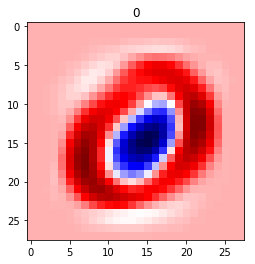

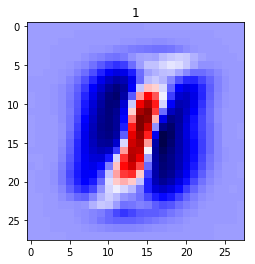

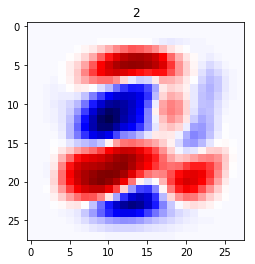

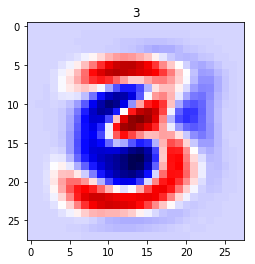

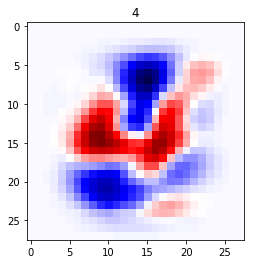

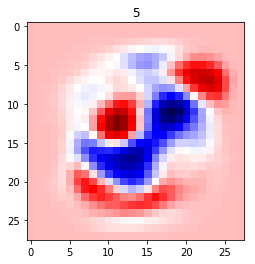

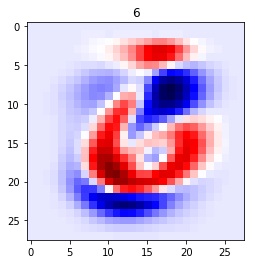

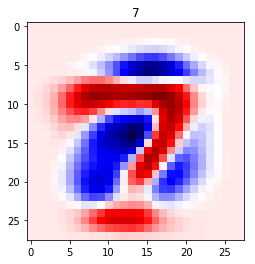

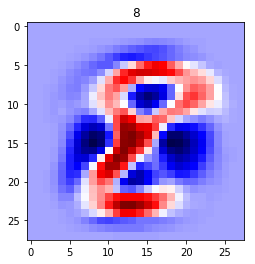

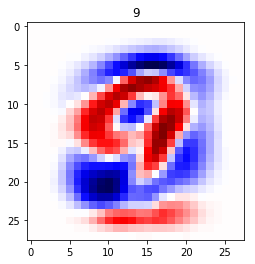

In [40]:
#  NO CODE HERE 
#
# from previous experiments, for comparison

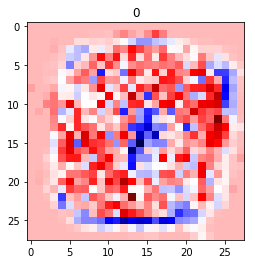

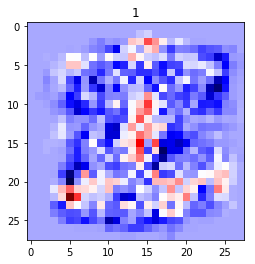

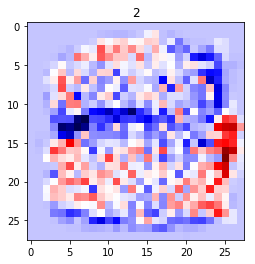

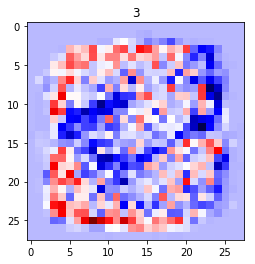

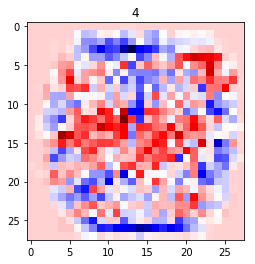

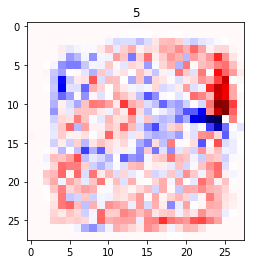

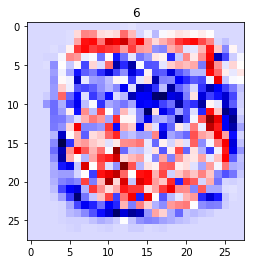

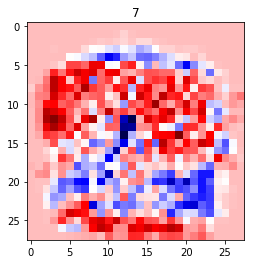

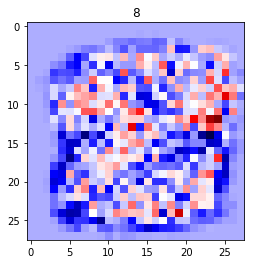

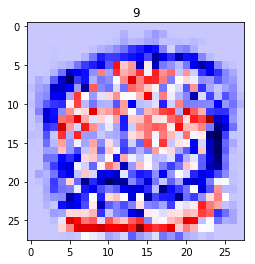

In [103]:
W_val = sess.run(W)
for i in range(10):
    plt.title(str(i))
    img = np.reshape(W_val[:,i], [28, 28])
    plt.imshow(img, cmap=plt.get_cmap('seismic'))
    plt.show()

In [ ]:
sess.close()